In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(13.7,10.27)})


In [3]:
#Importanto os dados
dados = pd.read_csv('C:/Users/mathe/OneDrive/Documentos/Data Science/avocado.csv');
#dados['Date'] = pd.to_datetime(dados['Date'])
dados.head(5) #Vejo que a primeira coluna refere-se ao índice dos registros, portanto posso excluí-la.
#dados.describe()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
dados.drop('Unnamed: 0', axis = 'columns', inplace = True)
dados.head(5)
dados.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
label = LabelEncoder()
label.fit(dados.type.drop_duplicates()) 

cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(dados[cols].values.T)
#print(dados[cols].values)
hm = sns.heatmap(cm, annot = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [13]:
#Verificando se existem dados faltantes
dados.isnull().sum()
#Não existem dados faltantes


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Skewness: 0.5803027378878419 
 Kurtosis: 0.3251958506534338


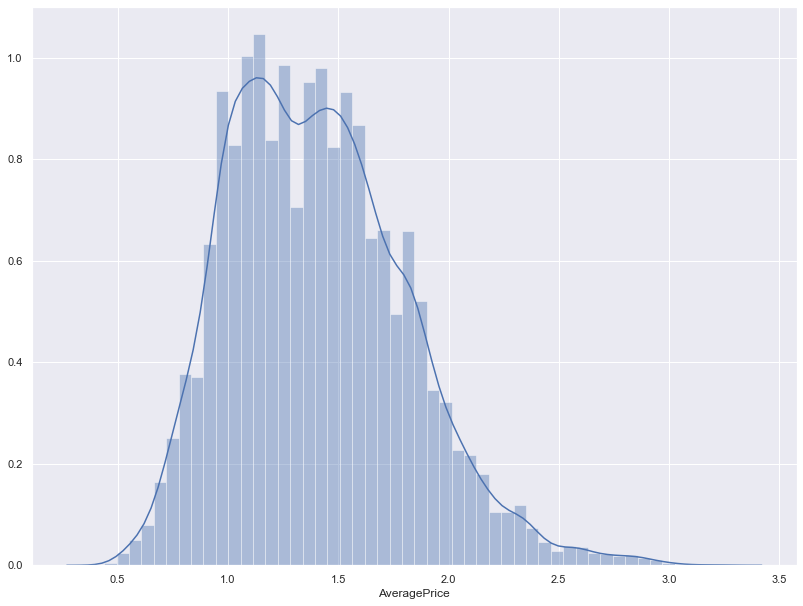

In [14]:
#Visualizando os dados
#Vendo como o preço está distribuído
grafico_distribuicao = sns.distplot(dados["AveragePrice"])
print(F'Skewness: {dados["AveragePrice"].skew()} \n Kurtosis: {dados["AveragePrice"].kurt()}')
#Vejo que a obliquidade dos dados (Skewness) é positiva, ou assimétrica à direita, portanto, os dados se concentram mais ao lado esquerdo.
#Vejo também que a Curtose é positiva, portanto os dados estão em uma distribuição letptocúritca. Ou seja, as caudas tem um peso maior curva de frequência é mais aberta do que a distribuição normal.
#Vale destacar que uma curtose alta indica caudas maiores, e portanto, mais outliers. Uma maneira eficiente de visualizar a assimetria e curtose é por meio de um histograma.


Skewness: 0.4740572176145093 
 Kurtosis: 0.17596470681724075


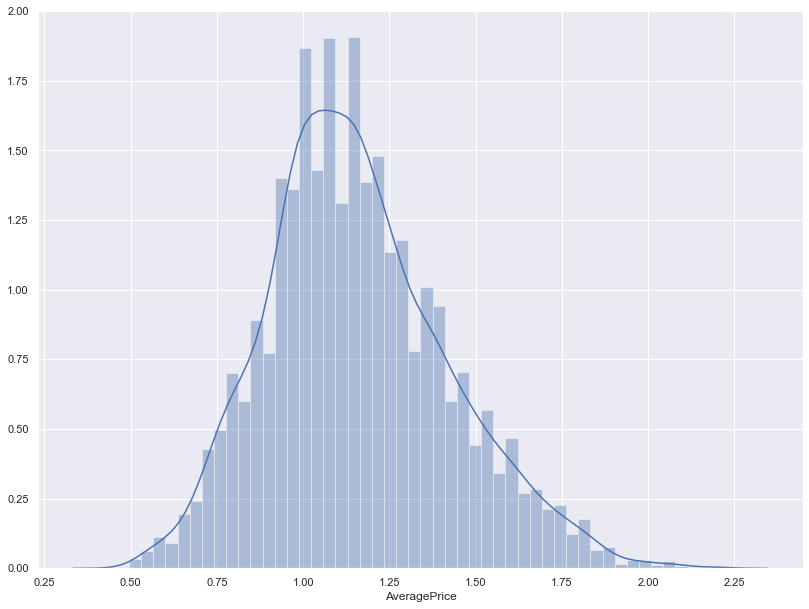

In [15]:
#Verificando a distribuição dos dados para o tipo abacate Convencional
sns.distplot(dados[dados['type'] == 'conventional']['AveragePrice'])
print(F'Skewness: {dados[dados["type"] == "conventional"]["AveragePrice"].skew()} \n Kurtosis: {dados[dados["type"] == "conventional"]["AveragePrice"].kurt()}')
#A assimetria dos preços (Skewnewss) é assimétrica a direita, portanto os dados estão mais concentrados no lado esquerdo do gráfico. Além disso, a moda > mediana > média
#Já a curtose (Kurtosis), por ser positiva, é leptocúrtica, o que quer dizer que há caudas mais pesadas, e portanto, os valores estão mais distante da média.

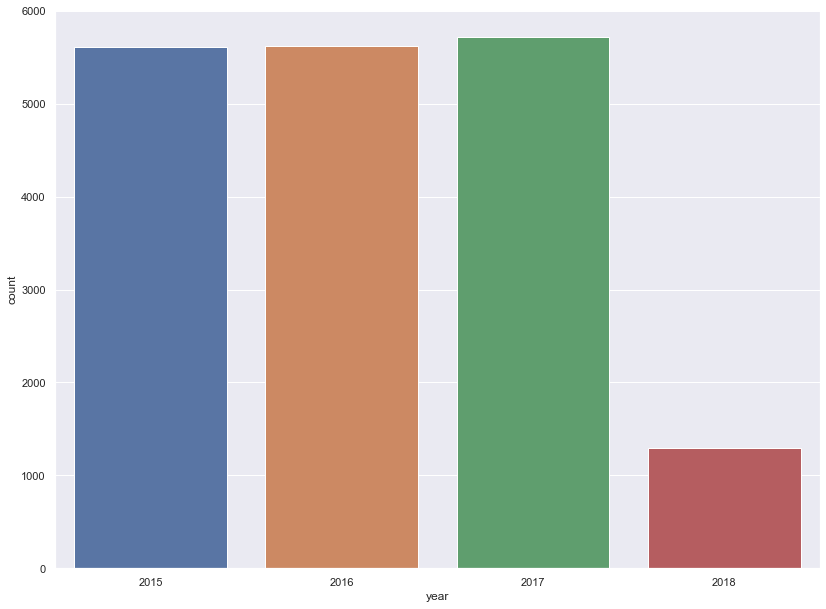

In [16]:
#Observando a contagem de registros para cada ano, é possível observar que o ano de 2018 tem bem menos registros do que os anos anteriores
sns.countplot(x='year',data = dados)


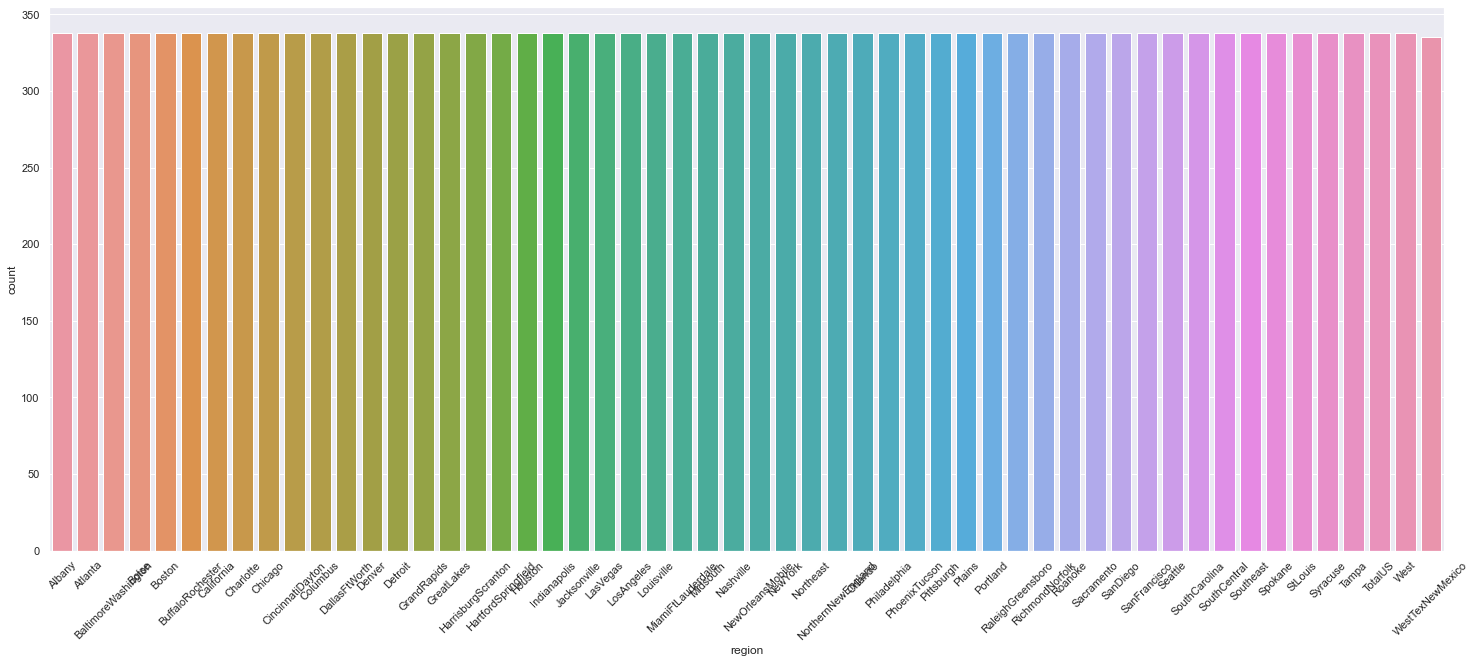

In [17]:
#Observando a contagem de registros por cidade, é possível ver que os dados estão igualmente distribuiídos,
plt.figure(figsize=[25,10])
plt.xticks(rotation=45)
sns.countplot(x='region',data=dados)


In [18]:
#Verificando a distribuição dos dados para o tipo abacate Convencional
#sns.distplot(dados[dados['type'] == 'organic']['AveragePrice'])
#print(F'Skewness: {dados[dados["type"] == "organic"]["AveragePrice"].skew()} \n Kurtosis: {dados[dados["type"] == "organic"]["AveragePrice"].kurt()}')

In [19]:
#Verificando quantos anos e regiões existem
anos = dados.year.unique()
regioes = dados.region.unique()
print(F"Quantidade anos: {len(anos)} \nAnos: {anos}, " )
print(F"Quantidade regioes: {len(regioes)}\nRegiões: {regioes}, ")


Quantidade anos: 4 
Anos: [2015 2016 2017 2018], 
Quantidade regioes: 54
Regiões: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'], 


In [20]:
#Encontrando quais as regiões onde o abacate teve o valor mais elevado
#teste = dados[dados['region'] == 'Albany'] 
#preco = teste.AveragePrice.mean()
#print(preco)


def pega_media_preco(dados,ano,regioes):
    df = pd.DataFrame(columns=['Region','AveragePrice','Std','year','type'])
    for regiao in regioes:
        precos_convencionais = {} #Abacates do tipo convencional
        precos_organicos = {} #Abacates do tipo organico
        regiao_media_desviop_ano_tipo = []
        
        #media_preco = dados[ddados['region'] == regiao].AveragePrice.mean()
        local = dados[dados['region'] == regiao]
        year = local[dados['year'] == ano]
        
        abacates_convencionais = year[year['type'] == 'conventional']
        media_preco_convencional = abacates_convencionais.AveragePrice.mean()
        desviop_convencional = abacates_convencionais.AveragePrice.std()
        
        regiao_media_desviop_ano_tipo.append(regiao)
        regiao_media_desviop_ano_tipo.append(media_preco_convencional)
        regiao_media_desviop_ano_tipo.append(desviop_convencional)
        regiao_media_desviop_ano_tipo.append(ano)
        regiao_media_desviop_ano_tipo.append('conventional')
        
        valores = pd.Series(regiao_media_desviop_ano_tipo,index=df.columns)
        df = df.append(valores,ignore_index=True)
        #df_convencional.head()
        
        regiao_media_desviop_ano_tipo = []
        #print(df.head())
        #precos_convencionais[regiao] = media_preco_convencional
        
        
        abacates_organicos = year[year['type'] == 'organic']
        media_preco_organico = abacates_organicos.AveragePrice.mean()
        desviop_preco_organico = abacates_organicos.AveragePrice.std()
        
        regiao_media_desviop_ano_tipo.append(regiao)
        regiao_media_desviop_ano_tipo.append(media_preco_organico)
        regiao_media_desviop_ano_tipo.append(desviop_preco_organico)
        regiao_media_desviop_ano_tipo.append(ano)
        regiao_media_desviop_ano_tipo.append('organic')
        valores = pd.Series(regiao_media_desviop_ano_tipo,index=df.columns)
        df = df.append(valores,ignore_index=True)
        #precos_organicos[regiao] = media_preco_organico
        
        #Ordena os dados em ordem decrescente
        lista_convencional = []
        lista_organico = []
        #lista_convencional = sorted(precos_convencionais, key= precos_convencionais.get, reverse=True) 
        #lista_organico = sorted(precos_organicos, key= precos_organicos.get, reverse=True)
    
    
    #valores = pd.Series(conteudo_df_organico,index=df_organico.columns)
    #df_organico = df_convencional.append(valores,ignore_index=True)
    
    return lista_convencional, lista_organico,df


In [21]:
#df_convencional = pd.DataFrame(columns=['Region','Average Price','Std','year','type'])
#regiao_media_desviop_ano_tipo=[0,1,2,3,4]
#valores = pd.Series(regiao_media_desviop_ano_tipo,index=df_convencional.columns)
#df_convencional = df_convencional.append(valores,ignore_index=True)
#df_convencional = df_convencional.append(valores,ignore_index=True)
#df_convencional.head()

precos_convencionais_2015,precos_organicos_2015,df_2015 = pega_media_preco(dados,2015,regioes)
precos_convencionais_2016,precos_organicos_2016,df_2016 = pega_media_preco(dados,2016,regioes)
precos_convencionais_2017,precos_organicos_2017,df_2017 = pega_media_preco(dados,2017,regioes)
precos_convencionais_2018,precos_organicos_2018,df_2018 = pega_media_preco(dados,2018,regioes)
dfs = [df_2015,df_2016,df_2017,df_2018]
dfs = pd.concat(dfs)
df_2016.head()

#OU PODERIA FAZER ASSIM: 
#df_media = avocado.groupby("region")["AveragePrice"].mean()
#i = 0
#while(i < 5):
#    print(precos_convencional.get(preco))

c:\users\mathe\pycharmprojects\data science\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Region,AveragePrice,Std,year,type
0,Albany,1.345769,0.176016,2016,conventional
1,Albany,1.722115,0.160127,2016,organic
2,Atlanta,0.972885,0.158663,2016,conventional
3,Atlanta,1.455385,0.329078,2016,organic
4,BaltimoreWashington,1.356538,0.233254,2016,conventional


In [ ]:
#Observando o preço do abacate convencional e organico para todas as regiões ao longo dos anos
#dados.sort_values(by=['AveragePrice'],inplace=True,ascending=False) 
#ax = sns.catplot(x='AveragePrice',y='region', data = dados, kind = 'bar', size=8, row='year', col='type')


In [23]:
#Quais cidades tiveram as maiores médias de preço em todos os anos?
df_convencional = dfs[dfs['type'] == 'conventional']
df_convencional.sort_values(by=['AveragePrice'], inplace=True,ascending=False)

#df_convencional.head()
df_convencional.iloc[:5]
#Ao longo dos 4 anos, as cidades que tiveram as maiores médias de preço para o tipo abacate convencional foram Chicago(2017), GrandRapids(2017), HartFordSpringField(2017), New York (2017), Philadelpia(2017)
#ax = sns.catplot(x='AveragePrice',y='Region', data = df_convencional, kind = 'bar', size=8)


c:\users\mathe\pycharmprojects\data science\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Region,AveragePrice,Std,year,type
16,Chicago,1.606226,0.324537,2017,conventional
28,GrandRapids,1.574906,0.325113,2017,conventional
34,HartfordSpringfield,1.574717,0.175637,2017,conventional
56,NewYork,1.573208,0.181815,2017,conventional
64,Philadelphia,1.547358,0.154249,2017,conventional


In [24]:
df_convencional.tail(5)
#Ao longo dos 4 anos, as regiões que tiveram as menores médias de preço para o tipo abacate convencional foram WestTexNewMexico(2015), PhoenixTucson (2012015,2016,2018) e Houston(2018), praticamente metade do preço top 5 regiões com preço mais elevado

,Region,AveragePrice,Std,year,type
106,WestTexNewMexico,0.771538,0.051120,2015,conventional
66,PhoenixTucson,0.724231,0.173695,2016,conventional
36,Houston,0.718333,0.118692,2018,conventional
66,PhoenixTucson,0.682500,0.101902,2018,conventional
66,PhoenixTucson,0.659808,0.102699,2015,conventional


In [25]:
df_organico = dfs[dfs['type'] == 'organic']
df_organico.sort_values(by=['AveragePrice'], inplace=True,ascending=False)

df_organico.head()
#Ao longo dos 4 anos, as cidades que tiveram as menores médias de preço para o tipo abacate organico foram São Francisco (2016,2017) e HartFordSpringField(2015,2016,2017)


c:\users\mathe\pycharmprojects\data science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,AveragePrice,Std,year,type
85,SanFrancisco,2.403208,0.346315,2017,organic
85,SanFrancisco,2.354038,0.357372,2016,organic
35,HartfordSpringfield,2.293077,0.167174,2016,organic
35,HartfordSpringfield,2.252692,0.175165,2015,organic
35,HartfordSpringfield,2.201887,0.301605,2017,organic


In [26]:
df_organico.tail()
#Ao longo dos 4 anos, as cidades que tiveram as menores médias de preço para o tipo abacate oranico foram Denver (2016), BuffaloRochester (2018), SouthCentral (2016), DallasFtWorth (2016) e Houston (2016).


,Region,AveragePrice,Std,year,type
25,Denver,1.227692,0.329953,2016,organic
11,BuffaloRochester,1.205833,0.081180,2018,organic
91,SouthCentral,1.195577,0.117046,2016,organic
23,DallasFtWorth,1.165000,0.140496,2016,organic
37,Houston,1.153077,0.190855,2016,organic


In [27]:
ts = dados.set_index('Date')
ts.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


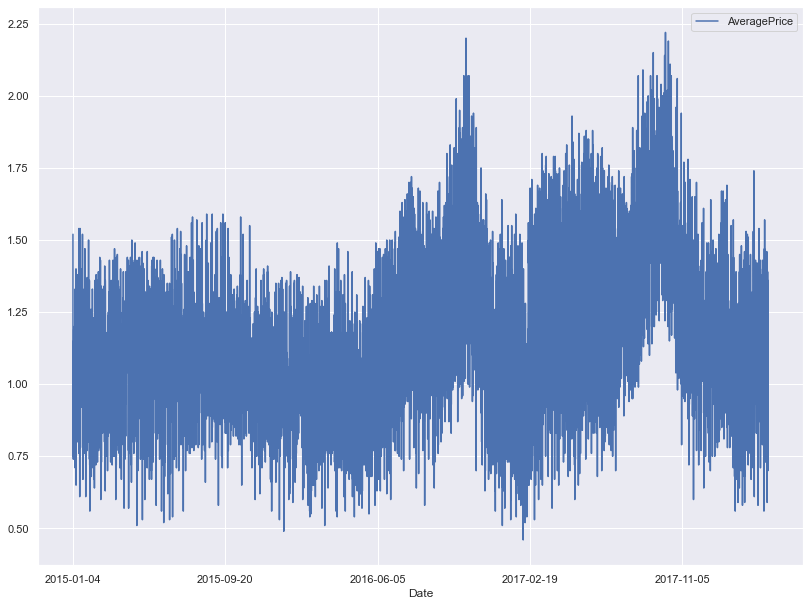

In [28]:
#É possível ver um aumento nos preços do abacate do tipo convencional ao longo dos anos. Além disso, no final de 2016 houve um grande aumento no preço dos abacates do tipo convencional, seguido de uma grande queda no início do ano de 2017. O mesmo acontece no final do ano de 2017 
dados.sort_values(by=['Date'],inplace=True)
dados[dados['type'] == 'conventional'].plot(x='Date', y='AveragePrice', x_compat=True)
#sns.lmplot(x='Date', y = 'AveragePrice', data = dados)


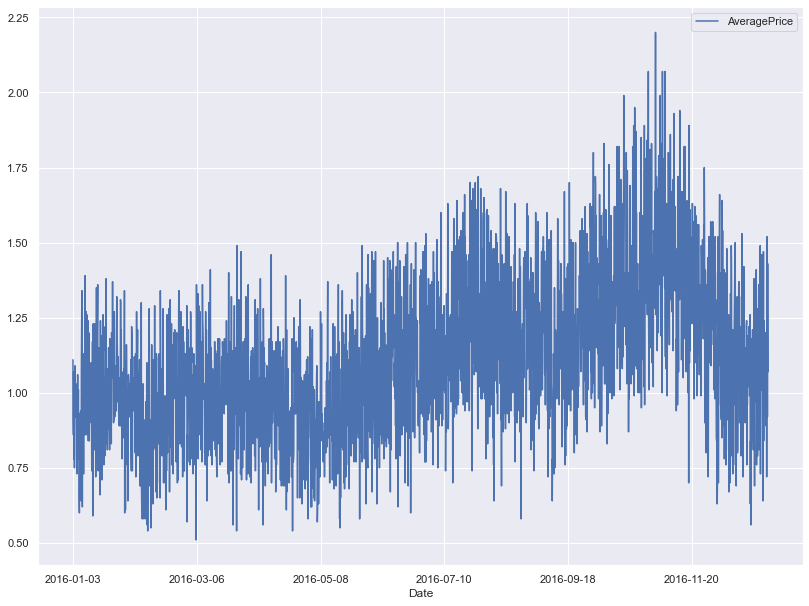

In [29]:
#Focando no período de 2016 a 2017, é possível ver melhor os preços  desse período
tipo_filtro = dados[dados['type'] == 'conventional']
ano_filtro = tipo_filtro[(tipo_filtro.Date >= '2016') & (tipo_filtro.Date <= '2017')]
ano_filtro.plot(x='Date', y='AveragePrice')


In [30]:
#Procurando as regiões onde o abacate foi vendido a mais de 2 U$, vemos que São Francisco e Chicago registraram esses preços.
ano_filtro[ano_filtro['AveragePrice'] > 2][['AveragePrice','Date','region']].head()

,AveragePrice,Date,region
3232,2.07,2016-10-30,Chicago
5000,2.20,2016-10-30,SanFrancisco
4999,2.07,2016-11-06,SanFrancisco
3231,2.07,2016-11-06,Chicago


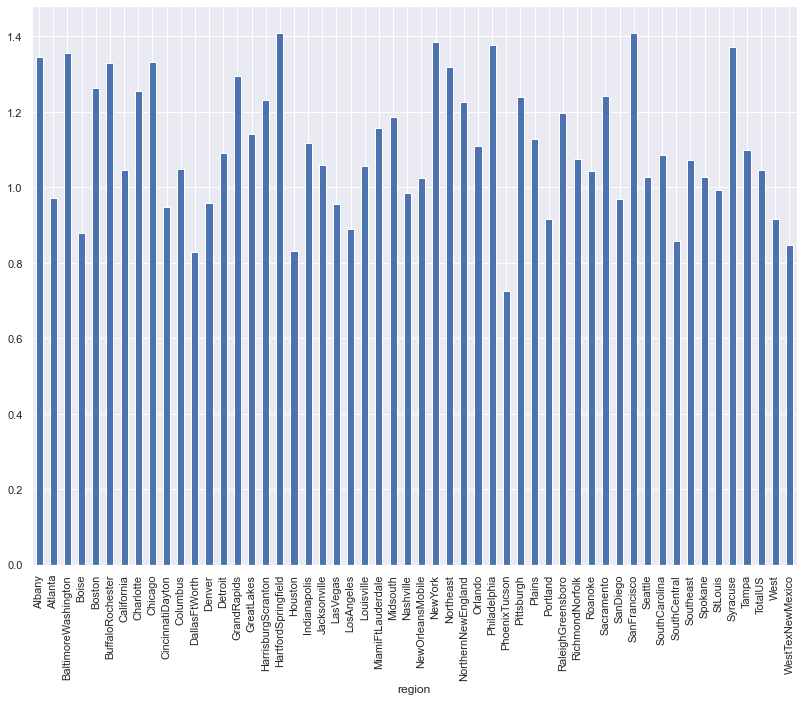

In [31]:
ano_filtro.groupby("region")['AveragePrice'].mean().plot(kind='bar')

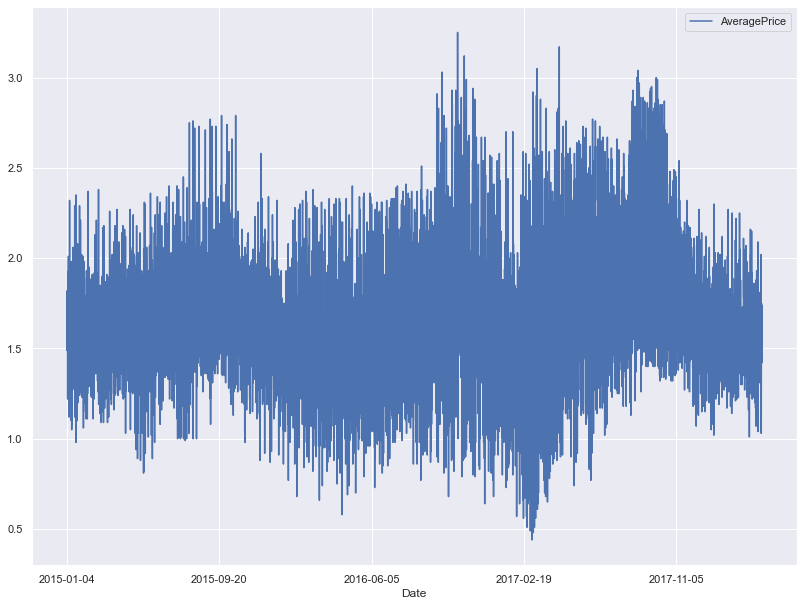

In [32]:
dados[dados['type'] == 'organic'].plot(x='Date', y='AveragePrice')

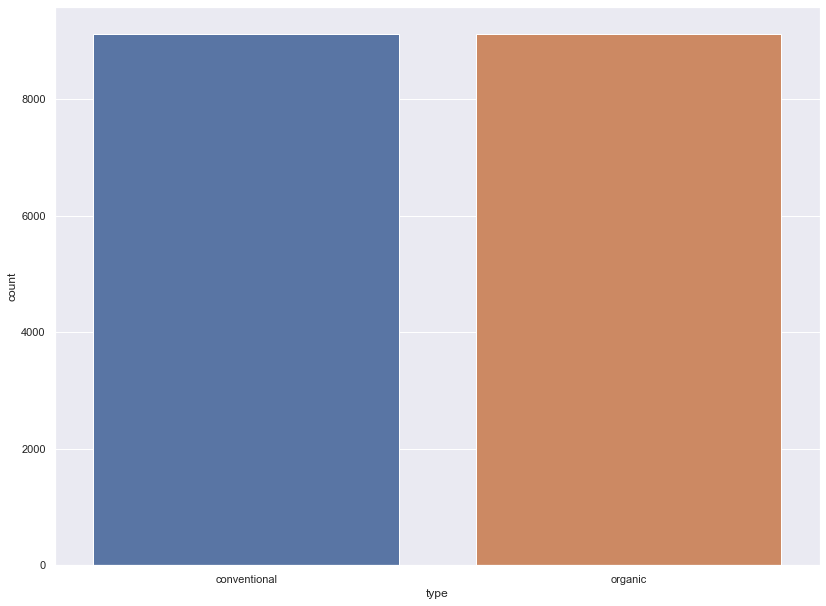

In [5]:
#Verificando a quantidade de tipos de abacates presentes na base de dados.
sns.countplot(data = dados, x = 'type')
#Com o gráfico, é possível observar que há a uma quantidade de abacates do tipo convencional e organico bem próximos. Dessa forma, é possível seguir com a comparação de ambos


           type  Total Volume
0  conventional  1.508722e+10
1       organic  4.361817e+08


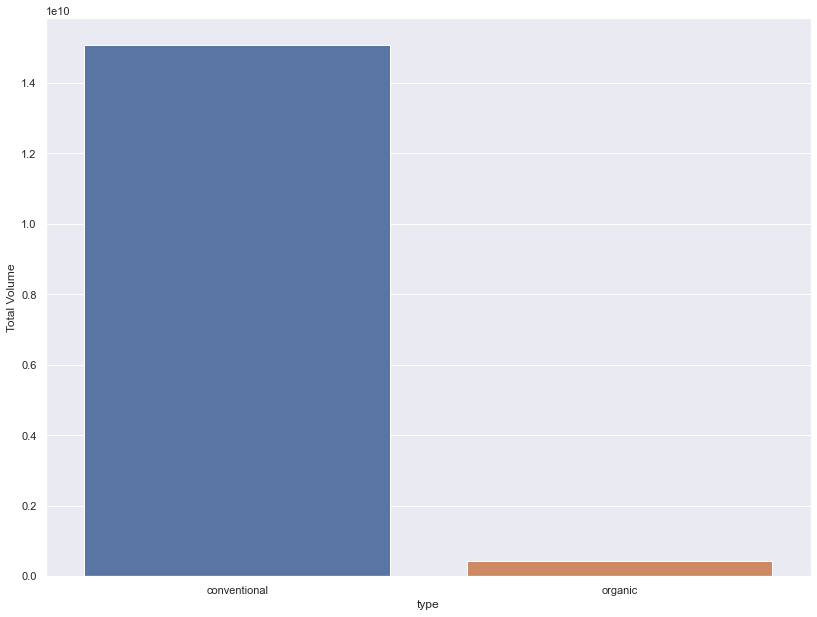

In [6]:
#Qual o tipo de abacate que mais vende?
tipos_abacate_volume = dados.groupby('type')['Total Volume'].sum().reset_index()
print(tipos_abacate_volume)
ax = sns.barplot(x = 'type', y = 'Total Volume', data = tipos_abacate_volume)
#É possível observar que o abacate do tipo convencional, apresenta um maior volume de vendas quando comparado ao tipo orgânico. Um possível fator poderia ser o preço do abacate convencional, que é mais barato.


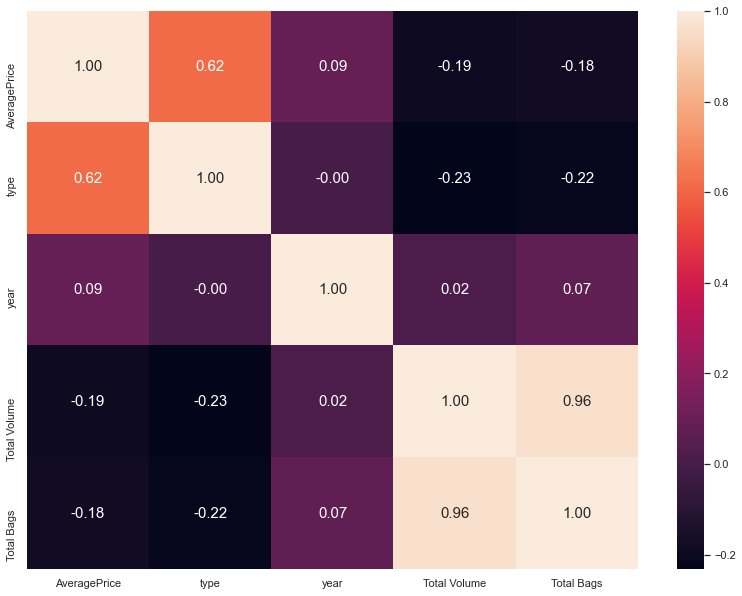

In [7]:
#Criando um Heatmap para ver a correlação entre as variáveis. Para isso, é necessário transformar a variável "type", que é categórica em uma varíavel 
label = LabelEncoder()
label.fit(dados.type.drop_duplicates())
dados.type = label.transform(dados.type)

cols = ['AveragePrice','type','year','Total Volume','Total Bags']
correlacao = np.corrcoef(dados[cols].values.T)
hm = sns.heatmap(correlacao, annot = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)
#É possível observar que há uma correlção forte entre o volume de abacates e o total de sacolas.
#Essa correlação faz sentido, uma vez que para armazenar mais abacates, mais sacolas são necessárias.
